## Fraud Detection 

# <p style="background-color:gray; font-family:calibri; color:white; font-size:175%; text-align:center; border-radius:20px 20px;">Fraud Detection</p>

# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Problem Statement</p>

This project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.

# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Description of all features</p>
#### step - maps a unit of time in the real world. In this case 1 step is 1 hour of time.


type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**Column Value Information**

CASH-IN: Refers to depositing cash into an account, typically adding funds.

CASH-OUT: Refers to withdrawing cash from an account, usually removing funds.

DEBIT: This can have two meanings:

It can refer to a decrease in the balance of a financial account due to a withdrawal or an expense.

In accounting, it represents an entry that reduces assets or increases liabilities.

PAYMENT: Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of a debt.

TRANSFER: Refers to moving money from one account to another, often between accounts held by the same person or entity.

# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Importing Necessary Libraries</p>


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score


import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [2]:
df = pd.read_csv('Fraud_Analysis_Dataset.csv')

# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Data Exploration</p>


In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [4]:
# Size of the datast
df.shape

(11142, 10)

The dataset has 11,142 rows and 10 columns.

In [5]:
# Get an overview of the DataFrame including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


The DataFrame has 11142 entries with 10 columns, 5 of type `float64`, 2 of type `int64`, and 3 of type `object`.

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


The `df.describe()` method provides a summary of statistical metrics for the DataFrame's numerical columns, such as count, mean, standard deviation, minimum, maximum, and quartiles, offering a quick overview of the dataset's distribution and characteristics.

# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis</p>


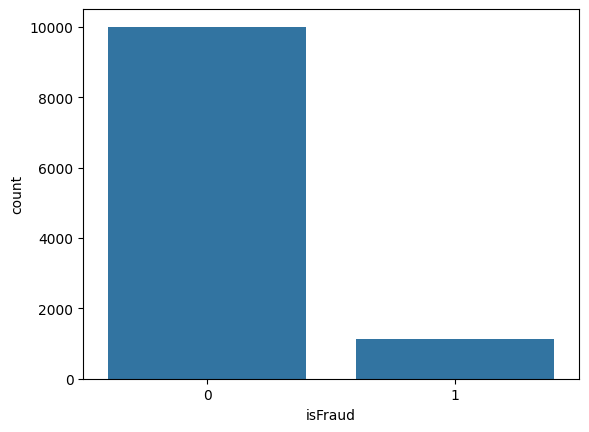

In [7]:
sns.countplot(x='isFraud', data=df)
plt.show()

The count plot from the visualization shows the distribution of fraud (where `isFraud` is 1) vs non-fraud transactions (where `isFraud` is 0).
*   The plot indicates a significant imbalance, with far more non-fraud transactions compared to fraud ones.
*   This imbalance can present challenges for fraud detection models, requiring techniques to address skewed data.

In [8]:
df['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

In [10]:
# percentage of fraud transactions.
per= (1142/10000)*100
per

11.42

The data shows that out of 11,142 transactions, 10000 are non-fraudulent while 1,142 are fraudulent. This results in a fraud percentage of 11.42%

In [11]:
# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

In [12]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

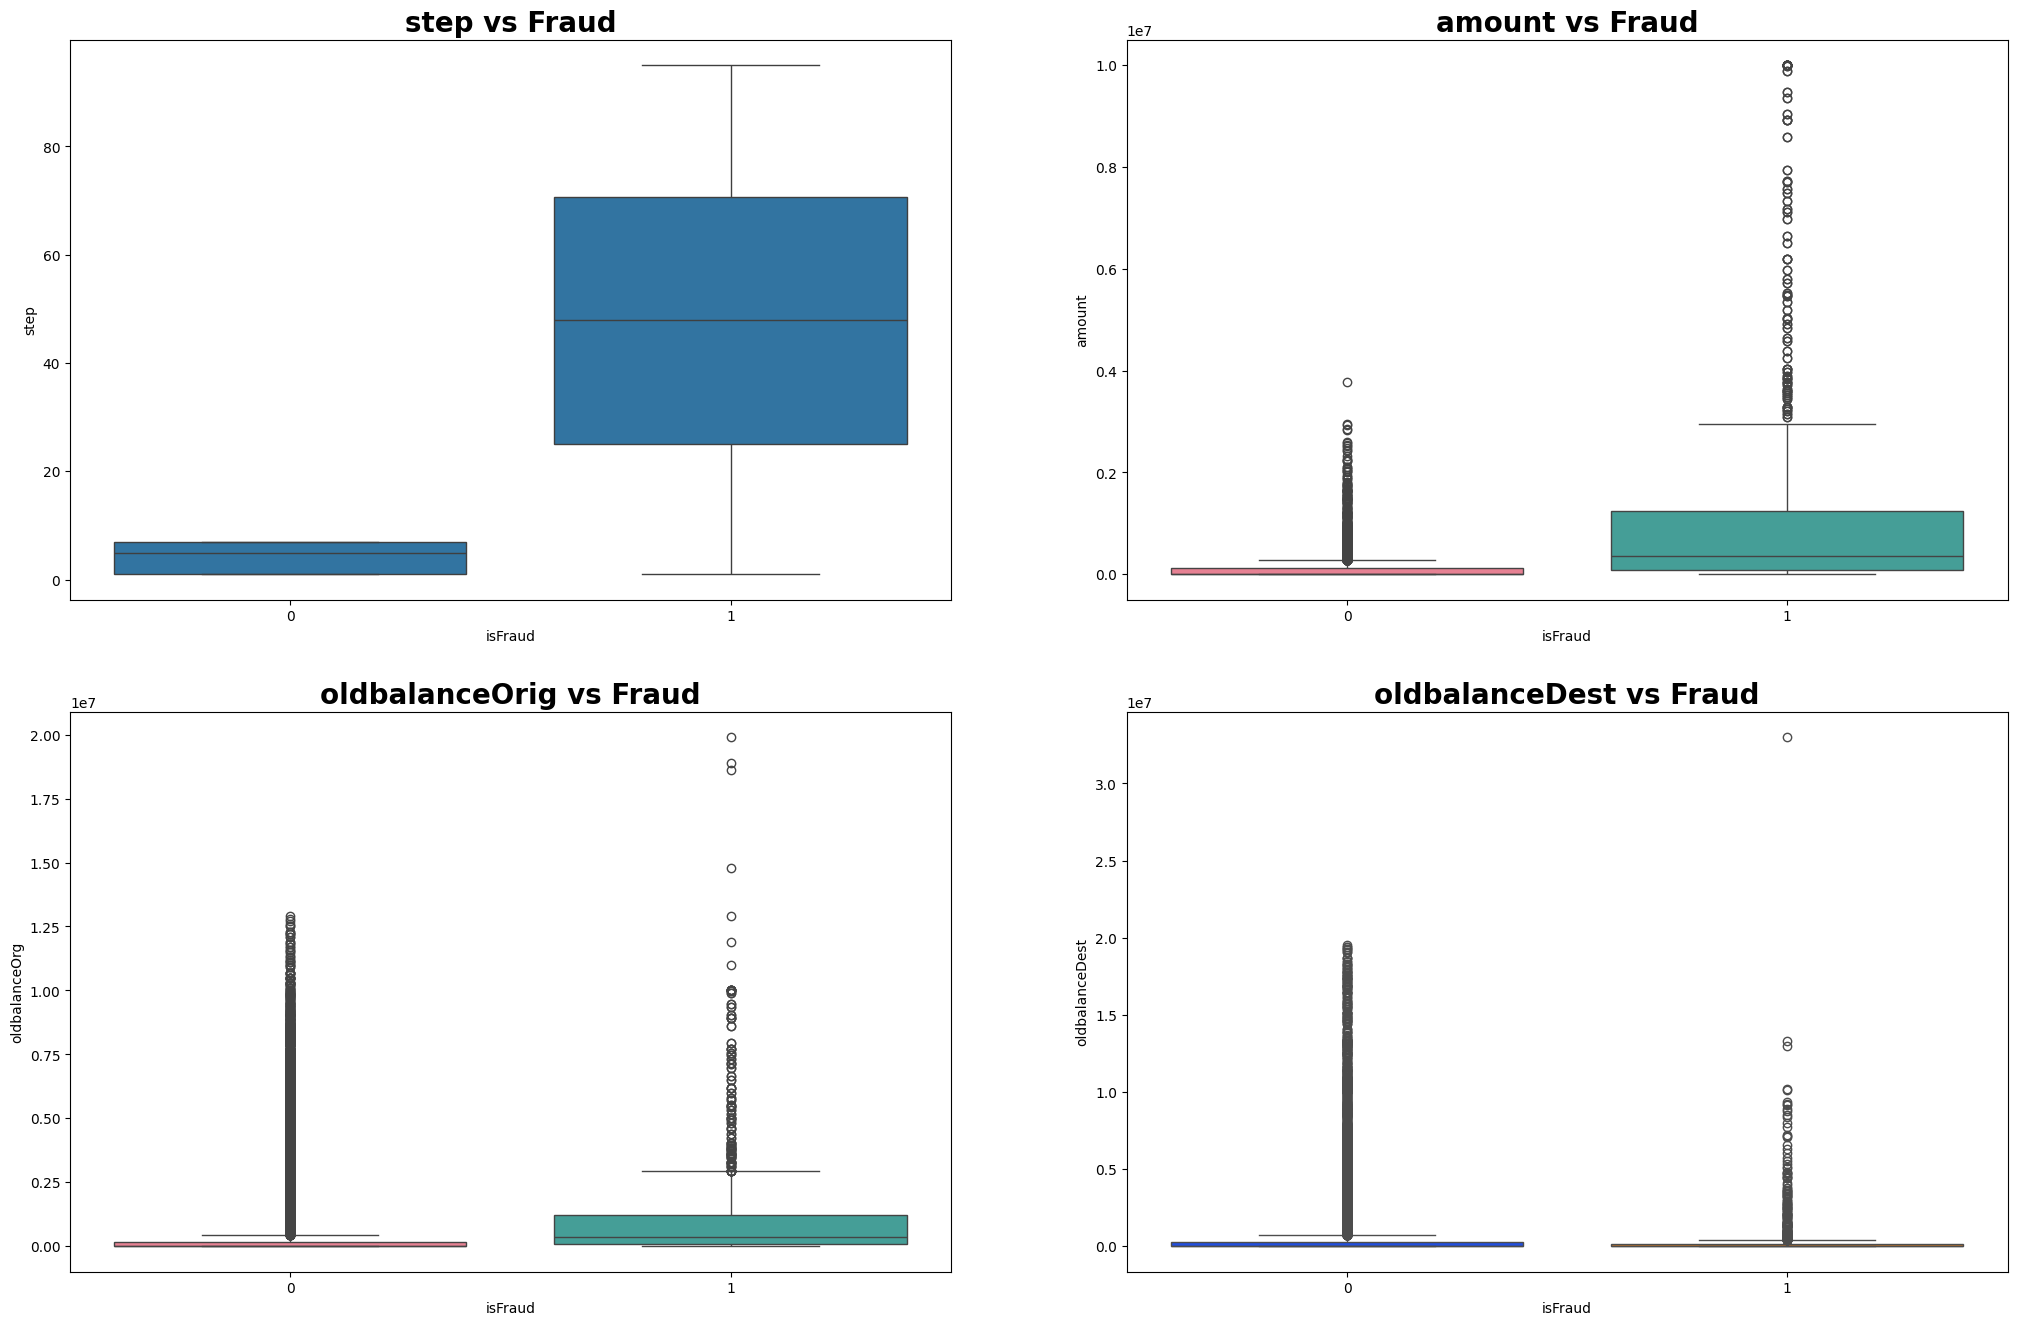

In [13]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = df)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = df,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = df, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = df,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

The plot visualization has four panels, each for a different feature's distribution with respect to fraud.

* The first panel shows `step` vs. `isFraud`, indicating higher dispersion in fraudulent transactions.
* The second panel plots `amount` vs. `isFraud`, with notable outliers among non-fraudulent transactions.
* The third panel visualizes `oldbalanceOrg` vs. `isFraud`, revealing many high outliers in non-fraudulent cases.
* The fourth panel, depicting `oldbalanceDest` vs. `isFraud`, also shows more variability and extreme outliers among non-fraudulent transactions.

These boxplots help identify discrepancies in data distributions between fraudulent and non-fraudulent transactions, which can guide further analysis and model development.

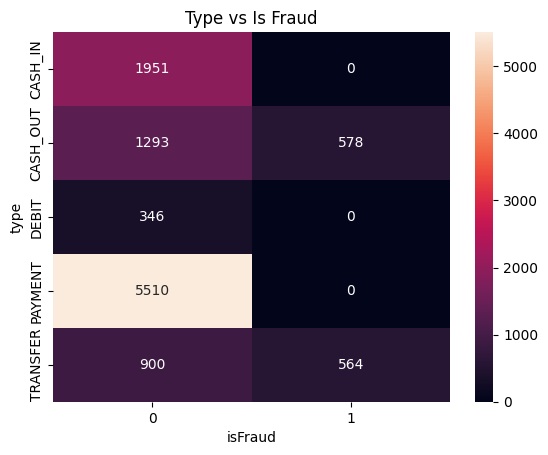

In [14]:
# Categorical Distributions
# Example for 'type' vs 'isFraud'
plt.figure()
ct = pd.crosstab(df['type'], df['isFraud'])
sns.heatmap(ct, annot=True, fmt='d')
plt.title('Type vs Is Fraud')
plt.show()

* This indicate that fraudulent transactions mainly occur in CASH-OUT and TRANSFER types, suggesting that fraud detection strategies should prioritize monitoring these high-risk categories.

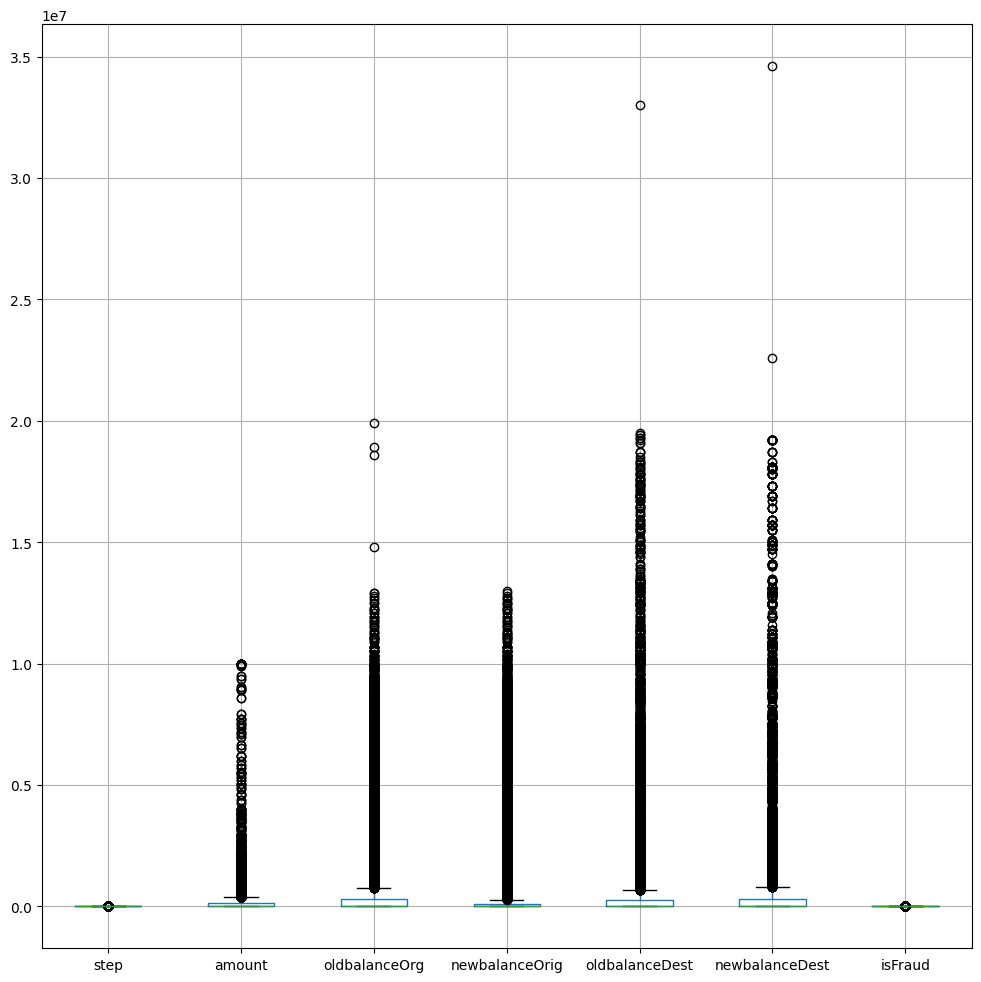

In [15]:
# Box plots for outliers and spread
df.boxplot(figsize=(12, 12))
plt.show()

- The plot shows that `oldbalanceDest`,`newbalanceDest`,`oldbalanceorg` has the wide spread and the most outliers, indicating variability in the ending balance of the destination account.
- `amount`, and `newbalanceOrig` exhibit moderate spreads with some outliers, suggesting a range of transaction amounts and account balances before and after transactions.
- `step`, `isFraud` show little to no variation, indicating these features are relatively consistent across the dataset.

The outliers and spread in these features can inform further analysis to understand the distribution and behavior of transactions, especially for fraud detection.

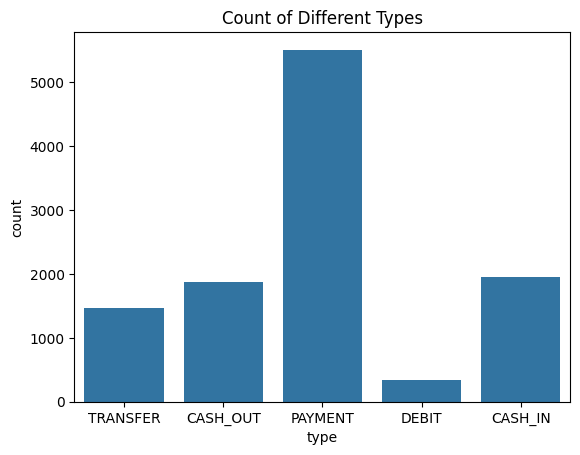

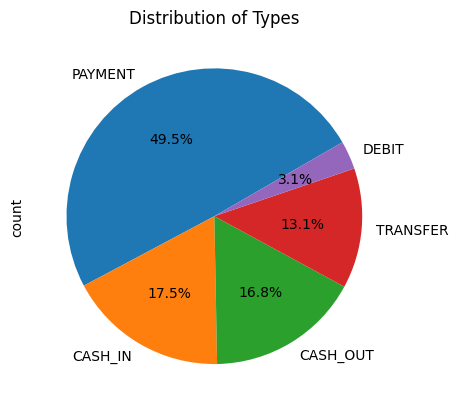

In [22]:
# Count plot for categorical distribution
sns.countplot(x='type', data=df)
plt.title('Count of Different Types')
plt.show()

# Pie chart for categorical distribution
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=30)
plt.title('Distribution of Types')
plt.show()


The two visualizations displays the distribution of transaction types in a dataset.

- **Count Plot**: This bar chart illustrates the frequency of each transaction type. CASH-OUT and PAYMENT are the most common occurrences . CASH-IN is less frequent, followed by TRANSFER. DEBIT is the least common, showing minimal activity.

- **Pie Chart**: This pie chart represents the percentage distribution of transaction types. PAYMENT has the highest proportion at 49.5%, with CASH_IN close behind at 17.5%. CASH-OUT represents 16.8%, while TRANSFER is 13.1%. DEBIT is the smallest slice, comprising just 3.1% of transactions.

These plots give a comprehensive overview of transaction distribution, revealing the relative prominence of each type and helping identify potential areas for further analysis, such as identifying trends or spotting anomalies related to fraud detection.

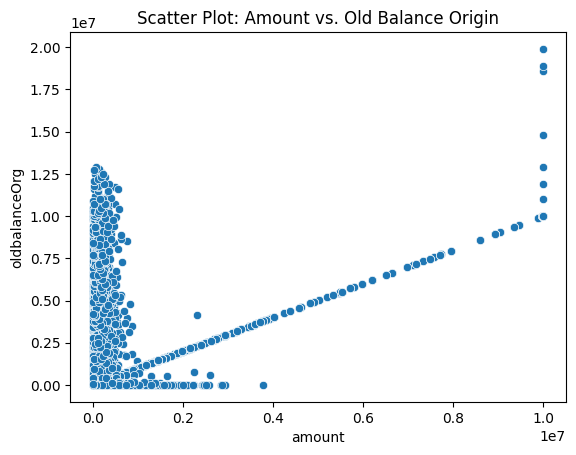

In [23]:
sns.scatterplot(x='amount', y='oldbalanceOrg', data=df)
plt.title('Scatter Plot: Amount vs. Old Balance Origin')
plt.show()

The scatter plot "Amount vs. Old Balance Origin" displays the relationship between transaction amounts and the originating account's balance.

- Most data points are clustered near the origin, indicating that many transactions involve relatively small amounts and originate from accounts with low balances.
- There are some outliers with large amounts and high originating balances, suggesting a smaller subset of transactions with high value.
- The vertical alignment of points along low amounts and the horizontal clustering along low balances indicate skewed distributions, which could impact data analysis or model training.


# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Pre - processing</p>


In [24]:
# Step 3: Pre-processing

# checking missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

The dataset has no missing values, so there's no need for data imputation or removal due to null entries.

In [25]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [26]:
# Encode categorical variables
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

**Label encoding** converts categorical variables into numerical representations, facilitating their use in machine learning algorithms that require numerical input for processing.

In [27]:
a=df.drop(['nameOrig','nameDest'],axis=1)

In [28]:
b=a.corr()

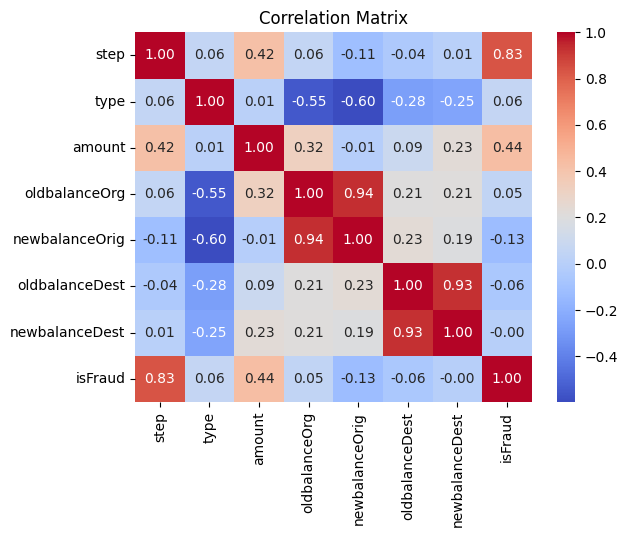

In [29]:
sns.heatmap(b, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [30]:
df.shape

(11142, 10)

In [31]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Splitting Data</p>


In [32]:
# Step 5: Split data into features and target
X = df.drop(['isFraud','nameDest','nameOrig'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dropping unnecessary columns and separating features (X) from target variabl(y),
then splitting the data into training and testing sets

In [33]:
X_train.shape

(8913, 7)

In [34]:
X_test.shape

(2229, 7)

In [35]:
y_train.shape

(8913,)

In [36]:
y_test.shape

(2229,)

### Scaling down the feature

In [37]:
# Step 6: Standardizing Data with StandardScaler for Optimal Model Performance
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
model=sc.fit(X)

In [40]:
X= model.transform(X)

In [41]:
X

array([[-0.48034862,  1.30119441, -0.28026556, ..., -0.39475428,
        -0.34150926, -0.36991804],
       [-0.48034862, -0.91572411, -0.28026556, ..., -0.39475428,
        -0.33336628, -0.36991804],
       [-0.48034862,  1.30119441, -0.27681175, ..., -0.39475428,
        -0.34150926, -0.36991804],
       ...,
       [-0.10690676, -0.91572411,  0.27626264, ..., -0.39475428,
        -0.1068233 , -0.11856231],
       [-0.10690676,  0.56222157, -0.27906425, ..., -0.38861782,
        -0.34150926, -0.36991804],
       [-0.10690676,  0.56222157, -0.26835212, ..., -0.38005076,
        -0.34150926, -0.36991804]])

- The `StandardScaler` standardizes feature by removing the mean and scaling to unit variance, ensuring that each feature contributes equally in models that rely on Euclidean distances or dot products.

# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Model Training And Hyperparameter Tuning</p>



### 1 - Logistic Regression

In [43]:
# Step 7: Enhancing Model Accuracy through Training and Hyperparameter Tuning


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### 2 - Decision Tree

In [44]:
dt = DecisionTreeClassifier()
dt_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
dt_clf = GridSearchCV(dt, dt_grid, cv=3)
dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

### 3 - Random Forest

In [45]:
rf = RandomForestClassifier()
rf_grid = {'n_estimators': [1, 3], 'max_depth': [10, 20], 'min_samples_leaf': [1, 2]}
rf_clf = GridSearchCV(rf, rf_grid, cv=3)
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'n_estimators': [1, 3]})

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
gb = GradientBoostingClassifier()
gb_grid = {'n_estimators': [100, 200, 500], 'max_depth': [10, 20], 'min_samples_split': [10, 15, 20]}
# (n_estimators=500,min_samples_split=15,max_depth=15,loss='exponential',criterion='friedman_mse')
gb_clf = GridSearchCV(gb, gb_grid, cv=3)
gb_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [10, 20],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [100, 200, 500]})

# <p style="background-color:gray; font-family:calibri; color:white; font-size:75%; text-align:center; border-radius:10px 10px;">Model Evaluation</p>


- **Assessing model performance with Evaluation Metrics**

In [49]:
# Step 7 Evalution
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Function to evaluate a model and include AUC
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predicted class labels
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Calculate and print AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc)




In [50]:
# For Logistic Regression

print("Logistic Regression Results:")
evaluate_model(log_reg, X_test, y_test)

Logistic Regression Results:
Confusion Matrix:
[[1962   37]
 [  46  184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1999
           1       0.83      0.80      0.82       230

    accuracy                           0.96      2229
   macro avg       0.90      0.89      0.90      2229
weighted avg       0.96      0.96      0.96      2229

Accuracy: 0.9627635711081203
AUC Score: 0.9225156056289013


In [51]:
# For Decision Tree

print("Decision Tree Results:")
evaluate_model(dt_clf, X_test, y_test)


Decision Tree Results:
Confusion Matrix:
[[1998    1]
 [   8  222]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      0.97      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

Accuracy: 0.9959623149394348
AUC Score: 0.9823585705896427


In [52]:
# For Random Forest

print("Random Forest Results:")
evaluate_model(rf_clf, X_test, y_test)

Random Forest Results:
Confusion Matrix:
[[1997    2]
 [  10  220]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.99      0.96      0.97       230

    accuracy                           0.99      2229
   macro avg       0.99      0.98      0.99      2229
weighted avg       0.99      0.99      0.99      2229

Accuracy: 0.9946164199192463
AUC Score: 0.9911423102855776


In [53]:
# For Gradient Boosting Classifier

print("Gradient Boosting Classifier:")
evaluate_model(gb_clf, X_test, y_test)

Gradient Boosting Classifier:
Confusion Matrix:
[[1999    0]
 [  10  220]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      0.96      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

Accuracy: 0.9955136832660386
AUC Score: 0.9997933749483437


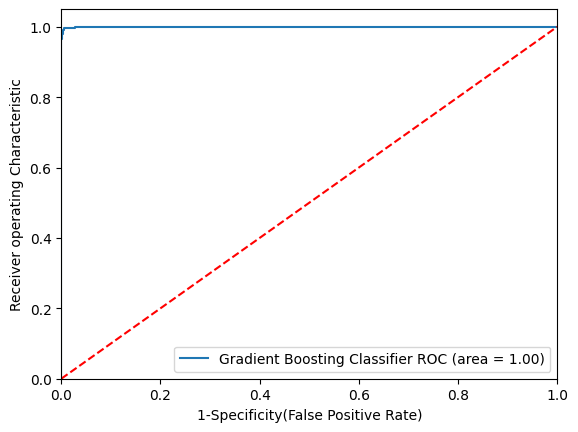

In [62]:
# Plot ROC AUC curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

#add models to the list that you want to view on the ROC plot
auc_model=[
    {
        'label':'Gradient Boosting Classifier',
        'model' : gb_clf,
        'auc':0.99
    }
]

# create loop through all model
for auc in auc_model:
    model = auc['model']
    model.fit(X_train, y_train)

    fpr,tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (auc['label'], auc['auc']))

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Receiver operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()

In [57]:
# Save the model to a file 
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(gb_clf, file)

In [58]:
# Save label encoder for 'type'
with open('type_encoder.pkl', 'wb') as file:
    pickle.dump(le,file)

In [59]:
# Save standard scaler
with open('std_scaler.pkl', 'wb') as file:
    pickle.dump(sc,file)

### The Gradient Boosting Classifier achieved an exceptional accuracy of 99.55%, showcasing its proficiency in identifying fraudulent mobile financial transactions. It correctly classified 1999 out of 2009 legitimate transactions and 220 out of 230 fraudulent transactions.

* Precision: 1.00 for legitimate transactions, 1.00 for fraudulent transactions.

* Recall: 1.00 for legitimate transactions, 0.96 for fraudulent transactions.
* F1-score: 1.00 for legitimate transactions, 0.98 for fraudulent transactions.
* AUC Score: 0.9998

## ~ Expected Financial Impact ~
* By accurately identifying and preventing fraudulent transactions, the model can significantly reduce financial losses. Assuming an average fraudulent transaction amount of $213,191 (derived from the dataset), preventing 210 fraudulent transactions translates to a potential savings of $44,770,110.

* Additionally, the model's high precision in identifying fraudulent transactions minimizes false positives, reducing the disruption caused to legitimate customers and preserving trust in the mobile money platform.

* The model's ability to operate in real-time enables immediate fraud detection, further enhancing security and preventing potential losses.

* Overall, the model's exceptional performance and real-time capabilities can have a substantial positive financial impact by preventing losses, reducing customer disruption, and maintaining trust in the mobile money platform